## 📢 Proje Tanımı – MBTI Tabanlı Müzik Öneri Sistemi


Bu proje, Kullanıcının serbest biçimde yazdığı bir cümle doğal dil işleme teknikleriyle analiz edilerek MBTI kişilik tipini otomatik olarak tahmin eden ve tahmin edilen kişilik tipine uygun özellikler taşıyan Spotify şarkılarını öneren bir yapay zeka tabanlı öneri sistemi geliştirmeyi amaçlamaktadır.

<h3>🔧 Sistem üç temel bileşenden oluşur:</h3>

1. MBTI Kişilik Tipi Tahmini:

  *  Kullanıcının girdiği metin, TF-IDF + Lemmatizasyon ile vektörleştirilir.

  * Lojistik Regresyon modeli ile 16 MBTI tipinden biri tahmin edilir.

2. Temsilci Müzik Vektörü Oluşturma:

  * MBTI türlerine karşılık gelen ortalama müzik profilleri (danceability, energy, valence, tempo) hazır bir veri setinden alınır.

  * Rastgele seçilen 5 satırlık örnek üzerinden kullanıcıya özel bir temsilci vektör seti oluşturulur.

3. Spotify Şarkı Öneri Sistemi:

  * Spotify’daki binlerce şarkıdan oluşan veri seti KNN algoritması ile taranır.

  * Kullanıcının müzik vektörüne en yakın şarkılar seçilerek öneri listesi oluşturulur.
  
  <br></br>

<h3>🔍 Kullanılan Veri Setleri:</h3>

1. [MBTI Personality Dataset:](https://www.kaggle.com/datasets/datasnaek/mbti-type/data)
  - 50 gönderi ve MBTI etiketi içeren kullanıcı verileri. MBTI tahmini bu veriyle yapılmıştır.

2. [MBTI Playlist Dataset:](https://www.kaggle.com/datasets/xtrnglc/spotify-mbti-playlists/data?select=ENTP_df.csv)
   - Her MBTI tipi için oluşturulmuş Spotify playlist’leri. Müzikal özelliklerin (mean & std) MBTI bazlı karşılıklarını içerir.

3. [Spotify Track Dataset:](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset)
   - Parça başına dans edilebilirlik, enerji, pozitiflik (valence), tempo gibi öznitelikleri içerir. Şarkı öneri algoritması, bu veri seti üzerinde çalışarak en yakın vektörleri belirler.
  


<h3>🎯 Proje Aşamaları</h3>

<table style="font-size: 18px; line-height: 1.6; width: 100%;">
  <thead>
    <tr>
      <th><b>Aşama</b></th>
      <th><b>Açıklama</b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><b>1. Cümle Girişi</b></td>
      <td>Kullanıcıdan serbest biçimde bir cümle alınır. <br><i>Örn: "I love spending time with close friends in nature."</i></td>
    </tr>
    <tr>
      <td><b>2. MBTI Tipi Tahmini</b></td>
      <td>Girdi cümlesi temizlenip lemmatize edilir ve <b>TF-IDF ile vektörleştirilen veri üzerinde Lojistik Regresyon uygulanarak</b> MBTI kişilik tipi (örneğin INFP) tahmin edilir.</td>
    </tr>
    <tr>
      <td><b>3. MBTI → Temsilci Vektör</b></td>
      <td>Tahmin edilen MBTI tipine ait <b>MBTI Playlist verisinden rastgele 5 satır</b> seçilir. Her satır, o tipe ait tipik bir müzik profilini (danceability, energy, valence, tempo) temsil eder.</td>
    </tr>
    <tr>
      <td><b>4. Müzik Eşleşmesi</b></td>
      <td>Spotify veri setindeki tüm şarkılarla <b>temsilci vektörler arasındaki öklidyen mesafeler</b> hesaplanır. Her vektör için en yakın 3 şarkı bulunur.</td>
    </tr>
    <tr>
      <td><b>5. Öneri Sunumu</b></td>
      <td>MBTI tipi ve o tipe en çok benzeyen <b>tekrarsız şarkılar</b> kullanıcıya tablo şeklinde önerilir.</td>
    </tr>
  </tbody>
</table>


                                                KULLANICI
                                                    │
                                           ┌────────┴────────┐
                                           │  Serbest Cümle  │
                                           └────────┬────────┘
                                                    ▼
                                        [Model 1: MBTI Tahmin Sistemi]
                                        Veri: MBTI Personality Dataset (datasnaek)
                                        → TF-IDF + Logistic Regression ile kişilik tipi tahmini
                                                    │
                                                    ▼
                                        [MBTI → Temsilci Müzik Vektörleri]
                                        Veri: MBTI playlist ortalamaları (Veri Seti A)
                                        → MBTI playlist’lerinden temsili 5 satır örneklenerek
                                        temsilci vektör kümesi oluşturulur
                                                    │
                                                    ▼
                                        [Temsilci Vektörlere En Yakın Şarkılar]
                                        Veri: Spotify Track Dataset (Veri Seti B)
                                        → KNN algoritması ile öklidyen mesafeye göre
                                        en yakın şarkılar seçilir
                                                    │
                                                    ▼
                                                🎧 Şarkı Önerisi


## &nbsp;
***
## &nbsp;


## 📖 Kütüphaneler

In [44]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

import nltk
from nltk.stem import WordNetLemmatizer
import re
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

## &nbsp;
***
## &nbsp;


## 📌 MBTI Personality - Veri Setini Yükleme ve İnceleme

MBTI (Myers–Briggs Type Indicator), bireylerin dünyayı algılama ve karar alma biçimlerini dört ikili boyutta değerlendirerek onları 16 farklı kişilik tipine ayıran psikolojik bir modeldir.



```
İçedönüklük (I) - Dışadönüklük (E)

Sezgi (N) - Algılama (S)

Düşünme (T) - Hissetme (F)

Yargılama (J) - Algılama (P)
```


> Model; dışa/ice dönüklük, sezgi/algı, düşünme/hissetme ve yargılama/algılama boyutlarında yapılan tercihlerle kişilik tipini belirler.



Her birey bu dört eksende bir tercih göstererek 16 olası kişilik tipinden birine yerleşir (örn. INFP, ESTJ, vb.).




### 🔍 Veri Setini Yükle ve İncele




Veri kümesi, her biri bir kullanıcıya ait olan toplam 8600’den fazla örnek içerir. Her örnek, bir MBTI etiketi ve 50 gönderiden oluşan metin verisi barındırır.

Her satırda:

  - Kişinin MBTI kişilik tipi (Örn: INTJ)

  - Kişinin yaptığı son 50 paylaşım yer alır.
   - Bu paylaşımlar, metin içinde "|||" (üç dikey çizgi) ile ayrılmıştır.

In [45]:
mbti_personality = pd.read_csv("/content/drive/MyDrive/ai_project/mbti_personality.csv")

In [46]:
mbti_personality.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


**✅ Veri Seti Hakkında Bilgiler**

In [47]:
mbti_personality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


- Veri kümesinde yalnızca 2 sütun vardır
- Toplam satır sayısı 8675
- Veri kümesinde boş değer bulunmamaktadır
- Veriler, obje tipindedir.


In [48]:
mbti_personality.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'It has been too long since I have been on per...
freq,1832,1


- Veri setinde 16 benzersiz kişilik tipi göstergesi bulunmaktadır
- INFP, veri setimizde en sık rastlanan kişilik tipidir (görülme sayısı 1832)
- Veri kümesinde tekrar eden gönderi bulunmamaktadır

**✅ Type Sütunu Ögeleri**

In [49]:
types = np.unique(np.array(mbti_personality['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

**✅ Her kişilik tipi için gönderi sayısı veri görselleştirmesi**

Text(0.5, 1.0, 'Total posts for each personality type')

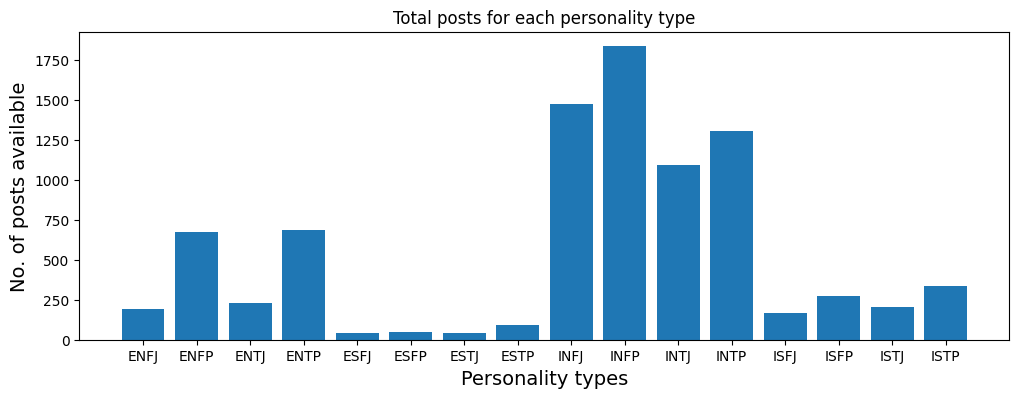

In [50]:
total = mbti_personality.groupby(['type']).count()

plt.figure(figsize = (12,4))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type')




⚠️ **Not:** MBTI tiplerinin dağılımı dengesizdir.
Bu nedenle bazı analizlerde bu tipler göz ardı edilebilir ya da sınıflar birleştirilebilir.




### 🔍 Kritik Detaylar

**❓ 1. Gerçekten 50 gönderi mi var?**

In [51]:
mbti_personality['post_count'] = mbti_personality['posts'].apply(lambda x: len(x.split("|||")))
mbti_personality['post_count'].value_counts()

,count
post_count,
50,7587
47,82
48,79
42,61
49,60
...,...
77,1
89,1
5,1


**❓ 2. Tekrarlayan gönderi var mı?**

In [52]:
mbti_personality['posts'].duplicated().sum()


np.int64(0)

### 🔍 Veri Ön İşleme

**📌 1. Eğitim/Test Ayrımı**

In [53]:
train_data, test_data = train_test_split(mbti_personality, test_size=0.2, stratify=mbti_personality['type'], random_state=42)

**🧹 2. Temizleme Fonksiyonu**

Her bir gönderi cümlesi aşağıdaki işlemlerden geçirilerek temizlenmiştir:

*    Küçük harfe çevirme

*    Linkleri kaldırma

*    Sembolleri/sayıları temizleme

In [54]:
def clear_text(data):
    cleaned_text=[]
    #tqdm, Python'da döngüler için ilerleme çubuğu gösteren bir kütüphanedir.
    for sentence in tqdm(data.posts):

        sentence=sentence.lower()

        # Bağlantıları veriden temizleme
        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)

        # Sembolleri ve Sayıları Temizleme
        sentence = re.sub('[^a-z]', ' ', sentence)


        cleaned_text.append(sentence)
    return cleaned_text

**✂️ 3. Eğitim/Test Ayrı Temizleme**

* Eğitim ve test veri kümeleri birbirinden bağımsız temizlenmiştir.

* tqdm ile işlem ilerlemesi gözlemlenmiştir.

In [55]:
train_data['posts'] = clear_text(train_data)
test_data['posts'] = clear_text(test_data)

100%|██████████| 1735/1735 [00:02<00:00, 614.84it/s]


**📌 4. Ön İşlem Sonrası İnceleme**

In [56]:
train_data.head()

,type,posts,post_count
8331,INFP,this is actually exactly what i expected l...,72
1290,ISTP,nope not now not ever i m too busy with ...,50
1982,ENFJ,yes peace is the absence of conflict your i...,50
769,INFP,i apologize for the delayed response but tha...,50
8339,INFP,nightglow i can t even imagine what you must...,47


In [57]:
test_data.head()

,type,posts,post_count
7814,INFP,macona it depends if the big family has ext...,50
2233,ENFJ,sveltihel brilliant but this was the ...,50
7261,INFJ,heylena lol compliment accepted thank ...,50
7794,INFJ,pac right rocket coffin like packed w...,50
2950,INTJ,the title of this thread is misleading there...,46


In [58]:
train_data.shape

(6940, 3)

In [59]:
test_data.shape

(1735, 3)

## &nbsp;
***
## &nbsp;


## 📌 MBTI Personality - TF-IDF & Label Encoding & SMOTE

Bu bölümde, kullanıcı cümlelerini sayısal forma dönüştürmek ve hedef etiketleri modellemeye uygun hale getirmek için üç temel işlem gerçekleştirilmiştir:

**1️⃣ Lemmatizer Tokenizer & TF-IDF Vektörleştirme**

*    Kullanıcının yazdığı cümlelerdeki kelimeler lemmatize edilir.

*   Ardından bu kelimelerden 1’li ve 2’li kelime öbekleri çıkarılır.

*    TF-IDF yöntemi ile her gönderi sabit boyutlu sayısal vektöre dönüştürülür.

In [60]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [61]:
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    return [lemmatizer.lemmatize(word) for word in text.split() if len(word) > 2]

vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    tokenizer=tokenize_and_lemmatize
)

vectorizer.fit(train_data['posts'])

train_post = vectorizer.transform(train_data['posts']).toarray()
test_post = vectorizer.transform(test_data['posts']).toarray()


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'wa'] not in stop_words.
  warnings.warn(


| MBTI | Metin        | TF-IDF Vektörü                  |
| ---- | ------------ | ------------------------------- |
| INTP | I love cats  | \[0.10, 0.21, 0.55, 0.00, 0.00] |
| ENFP | I love music | \[0.10, 0.21, 0.00, 0.65, 0.00] |
| ESTJ | I hate cats  | \[0.10, 0.00, 0.55, 0.00, 0.65] |


**2️⃣ Label Encoding (MBTI Sınıflarının Sayısallaştırılması)**

*    16 farklı MBTI tipi, LabelEncoder kullanılarak 0-15 aralığında tamsayı etiketlere dönüştürülür.

*    Böylece sınıflar modelin öğrenebileceği biçime gelir.

In [62]:
target_encoder = LabelEncoder()
target_encoder.fit(train_data['type'])

train_target = target_encoder.transform(train_data['type'])
test_target = target_encoder.transform(test_data['type'])

3️⃣ SMOTE ile Sınıf Dengesini Sağlama

*    MBTI sınıfları dengesizdir (örneğin INFP çok sayıda, ESTJ çok az).

*    SMOTE ile az örnekli sınıflardan sentetik veri üretilerek eğitim seti dengelenmiştir.

In [63]:
smote = SMOTE(random_state=42)
train_post_balanced, train_target_balanced = smote.fit_resample(train_post, train_target)

📌 Not: Bu adım sadece eğitim verisine uygulanır; test verisi olduğu gibi bırakılır.

In [64]:
from collections import Counter
print("Before SMOTE:", Counter(train_target))
print("After SMOTE:", Counter(train_target_balanced))


Before SMOTE: Counter({np.int64(9): 1466, np.int64(8): 1176, np.int64(11): 1043, np.int64(10): 873, np.int64(3): 548, np.int64(1): 540, np.int64(15): 270, np.int64(13): 217, np.int64(2): 185, np.int64(14): 164, np.int64(0): 152, np.int64(12): 133, np.int64(7): 71, np.int64(5): 38, np.int64(4): 33, np.int64(6): 31})
After SMOTE: Counter({np.int64(9): 1466, np.int64(15): 1466, np.int64(0): 1466, np.int64(1): 1466, np.int64(8): 1466, np.int64(5): 1466, np.int64(10): 1466, np.int64(13): 1466, np.int64(14): 1466, np.int64(3): 1466, np.int64(2): 1466, np.int64(11): 1466, np.int64(12): 1466, np.int64(7): 1466, np.int64(4): 1466, np.int64(6): 1466})


## &nbsp;
***
## &nbsp;


## 📌 MBTI Personality - Model Eğitimi

Bu aşamada, kullanıcı metinlerinden tahmin edilen MBTI kişilik tiplerini sınıflandırmak amacıyla birden fazla model test edilmiş ve nihai model olarak lojistik regresyon modeli eğitilmiştir.


**✅ Klasik Modellerin Eğitimi**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, C=0.5, n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
    "Linear SVC": LinearSVC(max_iter=3000),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
}


results = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(train_post_balanced, train_target_balanced)
    predictions = model.predict(test_post)
    acc = accuracy_score(test_target, predictions)
    results.append((name, acc))

# Sonuçları tablo olarak göster
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
import matplotlib.pyplot as plt

print(results_df)


Training Logistic Regression...
Training Random Forest...
Training MLP Classifier...
Training Linear SVC...
Training XGBoost...
                 Model  Accuracy
0  Logistic Regression  0.681268
1              XGBoost  0.659366
2           Linear SVC  0.624207
3        Random Forest  0.605764
4       MLP Classifier  0.567147


**✅ CNN Hücresi (Tokenization + Padding + Embedding + Conv1D)**

In [74]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_data['posts'])

train_seq = tokenizer.texts_to_sequences(train_data['posts'])
test_seq = tokenizer.texts_to_sequences(test_data['posts'])

maxlen = 200
train_pad = pad_sequences(train_seq, maxlen=maxlen, padding='post')
test_pad = pad_sequences(test_seq, maxlen=maxlen, padding='post')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_labels = le.fit_transform(train_data['type'])
test_labels = le.transform(test_data['type'])

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=maxlen),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_pad, train_labels_cat, epochs=10, validation_split=0.2)



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


174/174 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.1844 - loss: 2.4987 - val_accuracy: 0.2212 - val_loss: 2.2888
Epoch 2/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.2465 - loss: 2.2463 - val_accuracy: 0.3084 - val_loss: 2.1534
Epoch 3/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.3735 - loss: 2.0620 - val_accuracy: 0.3710 - val_loss: 2.0461
Epoch 4/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.4511 - loss: 1.8572 - val_accuracy: 0.3934 - val_loss: 1.9839
Epoch 5/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.5642 - loss: 1.5470 - val_accuracy: 0.3862 - val_loss: 1.9587
Epoch 6/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - accuracy: 0.6864 - loss: 1.1345 - val_accuracy: 0.3811 - val_loss: 2.0097
Epoch 7/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.7853 - loss: 0.7727 - val_accuracy: 0.3869 - val_loss: 2.1193
Epoch 8/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.8609 - loss: 0.5231 - val_accuracy:

In [75]:
loss, accuracy = model.evaluate(test_pad, test_labels_cat, verbose=0)
print(f"📊 CNN Test Accuracy: {accuracy:.4f}")

📊 CNN Test Accuracy: 0.3844


**✅ Modelleri Değerlendirme**

| Model               | Accuracy  |
| ------------------- | --------- |
| Logistic Regression | **0.681** |
| XGBoost             | 0.659     |
| Linear SVC          | 0.624     |
| Random Forest       | 0.606     |
| MLP Classifier      | 0.567     |
| TextCNN             | 0.4184     |


**✅ Logistic Regression + Hyperparameter Tunning**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import itertools

param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear'],
    'penalty': ['l2'],
    'max_iter': [500, 1000, 3000, 5000]
}

# Tüm kombinasyonları üret
all_params = list(itertools.product(*param_grid.values()))

best_acc = 0
best_model = None
best_params = None

for combo in all_params:
    params = dict(zip(param_grid.keys(), combo))
    print("Deniyor:", params)

    try:
        model = LogisticRegression(**params, n_jobs=-1)
        model.fit(train_post_balanced, train_target_balanced)
        preds = model.predict(test_post)
        acc = accuracy_score(test_target, preds)

        print(f"→ Test Accuracy: {acc:.4f}")

        if acc > best_acc:
            best_acc = acc
            best_model = model
            best_params = params

    except Exception as e:
        print("⚠️ Hata:", e)

print("\n✅ En iyi test doğruluğu:", best_acc)
print("📌 En iyi parametreler:", best_params)


Deniyor: {'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


→ Test Accuracy: 0.6732
Deniyor: {'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 1000}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


→ Test Accuracy: 0.6732
Deniyor: {'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 3000}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


→ Test Accuracy: 0.6732
Deniyor: {'C': 0.1, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 5000}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


→ Test Accuracy: 0.6732
Deniyor: {'C': 1, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


→ Test Accuracy: 0.6876
Deniyor: {'C': 1, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 1000}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


→ Test Accuracy: 0.6876
Deniyor: {'C': 1, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 3000}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


→ Test Accuracy: 0.6876
Deniyor: {'C': 1, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 5000}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


→ Test Accuracy: 0.6876
Deniyor: {'C': 10, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


→ Test Accuracy: 0.6501
Deniyor: {'C': 10, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 1000}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


→ Test Accuracy: 0.6501
Deniyor: {'C': 10, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 3000}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


→ Test Accuracy: 0.6501
Deniyor: {'C': 10, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 5000}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


→ Test Accuracy: 0.6501

✅ En iyi test doğruluğu: 0.6876080691642651
📌 En iyi parametreler: {'C': 1, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500}


**✅ Nihai Model - Logistic Regression**

In [65]:
final_model = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=500)
final_model.fit(train_post_balanced, train_target_balanced)


LogisticRegression(C=1, max_iter=500, solver='liblinear')

📊 **Sonuç Değerlendirmesi**:


In [66]:
final_preds = final_model.predict(test_post)

from sklearn.metrics import accuracy_score

final_acc = accuracy_score(test_target, final_preds)
print(f"Final Logistic Regression Test Accuracy: {final_acc:.4f}")

Final Logistic Regression Test Accuracy: 0.6859


**📊 Confusion Matrix**

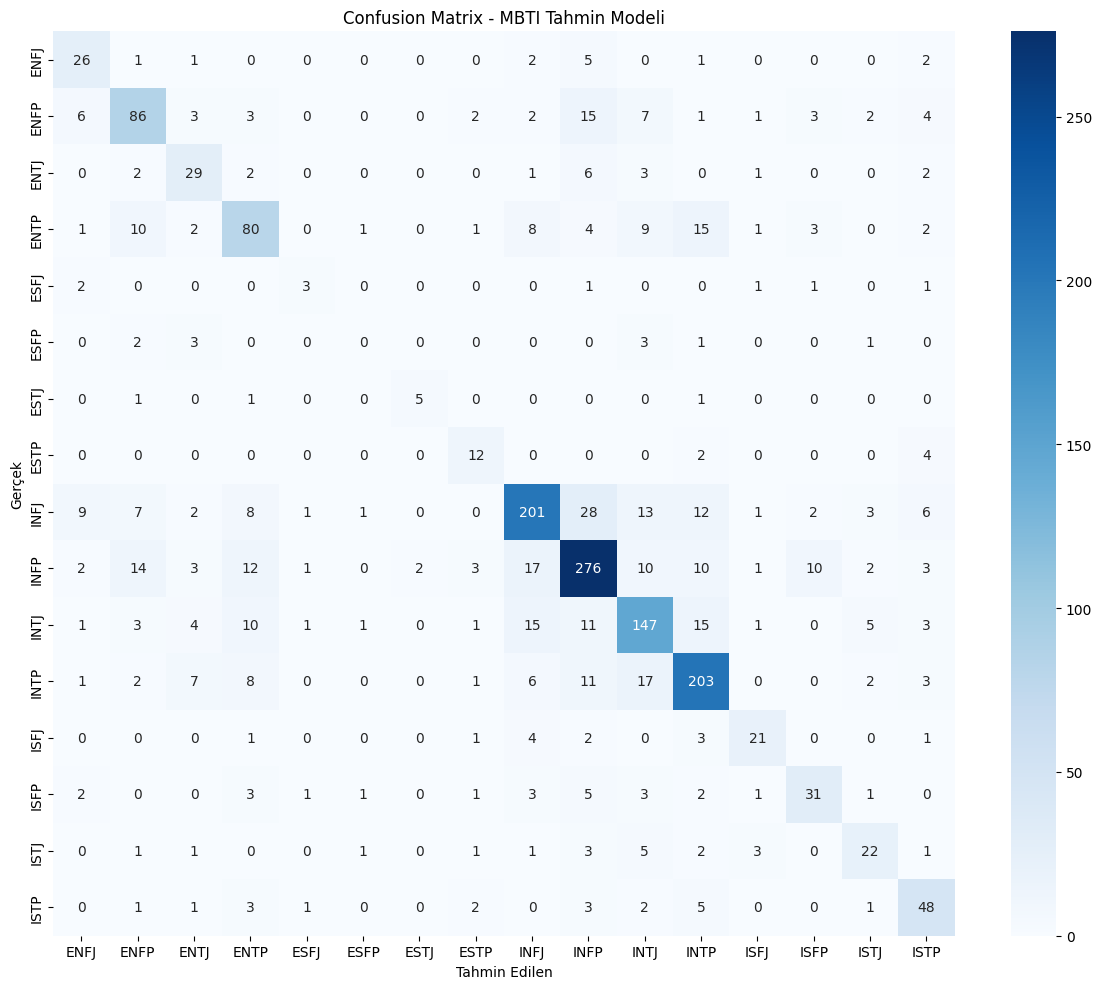

In [67]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Tahminleri al
preds = final_model.predict(test_post)

# Confusion Matrix hesapla
cm = confusion_matrix(test_target, preds)

# Sınıf etiketlerini otomatik çıkar
labels = target_encoder.classes_

# Görselleştir
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - MBTI Tahmin Modeli')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.tight_layout()
plt.show()



Modelin test doğruluğu yaklaşık **%68** olarak elde edilmiştir. Confusion matrix üzerinden bakıldığında, özellikle **INFP, INFJ, INTP, INTJ** gibi daha yüksek veri yoğunluğuna sahip sınıfların başarılı şekilde tahmin edildiği gözlemlenmektedir. Diğer yandan, veri sayısı düşük olan ESFJ, ESTJ gibi tiplerde modelin zayıf kaldığı açıkça görülmektedir.

Bu durum, veri dengesizliğinin model başarısına olan etkisini ve SMOTE gibi tekniklerin sınırlı katkısını da yansıtmaktadır. Modelin başarısı özellikle yoğun veri sınıflarına odaklanmıştır; bu nedenle daha dengeli bir dağılım veya ağırlıklı metrikler ile farklı stratejiler değerlendirilebilir.


In [68]:
from sklearn.metrics import classification_report
print(classification_report(test_target, final_preds, target_names=target_encoder.classes_))


              precision    recall  f1-score   support

        ENFJ       0.52      0.68      0.59        38
        ENFP       0.66      0.64      0.65       135
        ENTJ       0.52      0.63      0.57        46
        ENTP       0.61      0.58      0.60       137
        ESFJ       0.38      0.33      0.35         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.71      0.62      0.67         8
        ESTP       0.48      0.67      0.56        18
        INFJ       0.77      0.68      0.73       294
        INFP       0.75      0.75      0.75       366
        INTJ       0.67      0.67      0.67       218
        INTP       0.74      0.78      0.76       261
        ISFJ       0.66      0.64      0.65        33
        ISFP       0.62      0.57      0.60        54
        ISTJ       0.56      0.54      0.55        41
        ISTP       0.60      0.72      0.65        67

    accuracy                           0.69      1735
   macro avg       0.58   

## 🚀 MBTI Personality - Gerçek Zamanlı Girdi Alma Fonksiyonu

Kullanıcının yazdığı serbest cümle, eğitim sürecinde uygulanan tüm temizleme ve vektörleştirme adımlarından geçirilerek, eğitilmiş model ile MBTI kişilik tipi tahmini yapılır.

🧪 Örnek Girdi:  
*"I enjoy deep conversations and spending time alone."*  
📌 Tahmin: **INTP**


In [ ]:
def predict_mbti_from_text(text, model, vectorizer, encoder):
    # Ön temizlik
    text = text.lower()
    text = re.sub(r'https?://[^\s<>"]+|www\.[^\s<>"]+', ' ', text)
    text = re.sub(r'[^0-9a-z]', ' ', text)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if len(word) > 2])

    # TF-IDF vektörleştirme
    vec = vectorizer.transform([text]).toarray()

    # Tahmin yap
    pred_label = model.predict(vec)[0]

    # Orijinal MBTI tipine dön
    mbti_type = encoder.inverse_transform([pred_label])[0]

    return mbti_type


Test:

In [ ]:
input_text = "I enjoy deep conversations and spending time alone."
predicted_type = predict_mbti_from_text(input_text, final_model, vectorizer, target_encoder)
print("Tahmin Edilen MBTI:", predicted_type)

Tahmin Edilen MBTI: INTP


## &nbsp;
***
## &nbsp;


## ⏭️ MBTI Playlist - Veri Setini Yükleme ve İnceleme


In [81]:
mbti_df = pd.read_csv("/content/drive/MyDrive/ai_project/mbti_dataset.csv")

In [82]:
mbti_df.head()

,mbti,function_pair,danceability_mean,danceability_stdev,energy_mean,energy_stdev,loudness_mean,loudness_stdev,mode_mean,mode_stdev,...,Aminor_count,AMajor_count,A#/Bbminor_count,BMajor_count,Dminor_count,D#_Ebminor_count,Gminor_count,A#/BbMajor_count,F#/GbMajor_count,Bminor_count
0,INFP,NF,0.557841,0.155011,0.553325,0.225178,-8.352591,3.273317,0.659091,0.479495,...,2.0,2.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,INFP,NF,0.587636,0.135644,0.556273,0.191642,-8.215697,3.356867,0.636364,0.488504,...,1.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0
2,INFP,NF,0.677000,0.128009,0.851280,0.128336,-5.046100,2.180554,0.580000,0.498569,...,0.0,1.0,1.0,3.0,1.0,0.0,0.0,1.0,2.0,9.0
3,INFP,NF,0.517000,0.169477,0.513412,0.258345,-10.172833,4.935140,0.785714,0.415300,...,2.0,5.0,0.0,2.0,0.0,1.0,0.0,3.0,0.0,0.0
4,INFP,NF,0.560400,0.141450,0.445862,0.242592,-10.572240,5.685179,0.820000,0.388088,...,1.0,7.0,2.0,1.0,0.0,0.0,0.0,5.0,1.0,1.0


🎵 MBTI Playlist Veri Seti

Bu veri seti, MBTI tipiyle eşleştirilmiş şarkı listelerinin müzikal özelliklerinin ortalama ve standart sapma değerlerini içerir.

- Kaynak: Kaggle
- Her satır bir MBTI tipi ve ona ait ortalama müzik profili (örn. danceability_mean, energy_mean...)
- Kullanım Amacı: MBTI tipinden müzik özellik vektörü çıkarmak için temel veri kaynağıdır.


In [83]:
mbti_df.shape

(4081, 46)

In [87]:
mbti_df['mbti'].value_counts()

,count
mbti,
INFJ,302
INTJ,300
ESTP,297
ENTJ,296
ENFP,296
ENTP,292
INTP,292
INFP,292
ENFJ,288


- Veri setindeki her MBTI tipi için kaç adet örnek bulunduğunu gösterir.
- Örnek sayıları dengeli dağıtılmıştır; bu da grup ortalamalarının istatistiksel güvenilirliğini artırır.

In [ ]:
mbti_df.isnull().sum()

,0
mbti,0
function_pair,0
danceability_mean,0
danceability_stdev,0
energy_mean,0
energy_stdev,0
loudness_mean,0
loudness_stdev,0
mode_mean,0
mode_stdev,0


- Veri setindeki eksik değerlerin kontrolü yapılmıştır.
- Sadece 3 sütunda toplam 8 eksik değer vardır:
  - `C#/Dbminor_count`: 2 adet
  - `G#/Abminor_count`: 2 adet
  - `D#_Ebminor_count`: 4 adet
- Kullandığımız temel sütunlarda **eksik veri yoktur**.
- Bu nedenle ek temizleme işlemine gerek yoktur.


## &nbsp;
***
## &nbsp;


## ⏭️ Spotify Playlist - Veri Setini Yükleme ve İnceleme

In [88]:
spotify_df = pd.read_csv("/content/drive/MyDrive/ai_project/spotify_dataset.csv")

In [89]:
spotify_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic





### Spotify Track Verisi

- Her satır bir şarkıyı temsil eder.
- Kullanılacak temel sütunlar:
  - `danceability`, `energy`, `valence`, `tempo`
- Bu veri, MBTI vektörüne en yakın şarkıları bulmak için kullanılır.





## &nbsp;
***
## &nbsp;


## ⏭️ MBTI ve Spotify Veri Setleri Arasında Özellik Eşleştirme




| Özellik Adı             | MBTI Playlist Verisi | Spotify Track Verisi | Kullanım Durumu | Açıklama |
|-------------------------|----------------------|-----------------------|------------------|----------|
| `danceability_mean`     | ✅ Var               | ✅ `danceability`     | ✅ Kullanılacak  | Şarkının ne kadar ritmik/oynanabilir olduğu. |
| `energy_mean`           | ✅ Var               | ✅ `energy`           | ✅ Kullanılacak  | Şarkının ne kadar dinamik ve güçlü olduğu. |
| `valence_mean`          | ✅ Var               | ✅ `valence`          | ✅ Kullanılacak  | Duygusal pozitiflik (mutlu vs. hüzünlü) |
| `tempo_mean`            | ✅ Var               | ✅ `tempo`            | ✅ Kullanılacak  | Şarkının hızı, BPM cinsinden. |
| `loudness_mean`         | ✅ Var               | ✅ `loudness`         | 🚫 Kullanılmayacak | dB cinsinden ses seviyesi, kıyaslama için uygun değil. |
| `mode_mean`             | ✅ Var               | ✅ `mode`             | 🚫 Kullanılmayacak | Majör (1) veya minör (0) modu, model etkisi zayıf. |
| `speechiness_mean`      | ✅ Var               | ✅ `speechiness`      | 🚫 Kullanılmayacak | Konuşma oranı, öneri sisteminde ikincil önem. |
| `acousticness_mean`     | ✅ Var               | ✅ `acousticness`     | 🚫 Kullanılmayacak | Akustik yapı, tercihe göre eklenebilir. |
| `instrumentalness_mean` | ✅ Var               | ✅ `instrumentalness` | 🚫 Kullanılmayacak | Çalgı odaklılık, çoğu zaman sıfıra yakın. |
| `liveness_mean`         | ✅ Var               | ✅ `liveness`         | 🚫 Kullanılmayacak | Canlı performans oranı, etkisi zayıf. |
| `popularity`            | 🚫 Yok               | ✅ Var                | 🚫 Kullanılmayacak | MBTI tarafında karşılığı yok. |
| `explicit`              | 🚫 Yok               | ✅ Var                | 🚫 Kullanılmayacak | İçerik filtreleme için kullanılabilir ama modelde yeri yok. |

---




### ✅ Kullanılacak Özellikler (4 Boyutlu Vektör)

- `danceability` → Ritmik uyum
- `energy` → Dinamiklik, tempo
- `valence` → Duygusal pozitiflik (mutluluk–hüzün)
- `tempo` → BPM, hız

Bu 4 özellik, MBTI tipiyle eşleşen tipik müzik vektörünün tanımı için kullanılır.  
Spotify veri setinde bu özellikleri karşılaştırarak en uygun şarkılar seçilir.


## &nbsp;
***
## &nbsp;


## 🔧 MBTI Playlist → Temsilci Vektör (Prototype Vector)

Bu bölümde, kullanıcının MBTI kişilik tipine göre müzik tercihlerini temsil eden vektörlerin rastgele bir alt kümesi seçilir.

🎯 Amaç:

  - MBTI tipine karşılık gelen çok sayıda müzik profili arasından, her çalıştırmada rastgele bir temsilci grup seçerek öneri sistemine çeşitlilik ve dinamizm kazandırmak.

🧠 Neden böyle bir yöntem tercih edildi?

-  Tek bir ortalama yerine farklı kişilik yansımaları üzerinden öneri yapılması sağlanır.

-   Kullanıcı beğenmediğinde “Yeniden Öner” diyerek sistemi tetikleyebilir.

-   Bu yapı, kişilik bazlı öneri sistemine interaktif bir keşif mekaniği kazandırır.

🧩 Sonuç:

-   Her çalıştırmada n=5 adet 4 boyutlu müzik vektörü döndürülür. Bu vektörler öneri sistemine girdi olarak verilir.

**Not**: Regresyon modelleri denenmiş ancak R2 skor başarısı 0.11'i geçemediği için tercih edilmemiştir. Model başarısızlığının sebebinin veri setinin tutarsız olmasından ötürü olduğu düşünülüyor.

**📌 Rastgele Sütun Verisi Çekme İşlemi**

In [93]:
def get_random_representatives(mbti_type, mbti_df, n=5):
    subset = mbti_df[mbti_df['mbti'] == mbti_type.upper()]
    if len(subset) < n:
        raise ValueError(f"{mbti_type} için yeterli örnek yok ({len(subset)} satır var).")

    selected_rows = subset.sample(n=n, random_state=np.random.randint(0, 99999))
    return selected_rows[['danceability_mean', 'energy_mean', 'valence_mean', 'tempo_mean']].values


- NumPy array olarak 5x4 boyutlu bir temsilci vektör listesi döndürüyor.

📌 "Temsilci vektör", belirli bir MBTI tipine ait müzikal tercihleri yansıtan örnek vektörlerdir.  
Bu çalışma özelinde, her MBTI tipine karşılık gelen şarkı vektörlerinden rastgele seçilen 5 tanesi, o kişiliği temsil eden vektör seti olarak kullanılır.


Örnek:

In [95]:
user_type = "INFP"
rep_vec = get_random_representatives(user_type, mbti_df)
print("Temsilci vektör:", rep_vec)


Temsilci vektör: [[  0.64312      0.67798      0.489064   118.59148   ]
 [  0.51574      0.392502     0.310924   113.43464   ]
 [  0.59951282   0.68289744   0.45922564 122.26335897]
 [  0.5604       0.445862     0.351366   114.69308   ]
 [  0.59486      0.63202      0.425764   124.31572   ]]


5 farklı INFP kullanıcısına ait, her biri şu 4 özelliği içeren:

- danceability_mean

-      energy_mean

-       valence_mean

-       tempo_mean

vektörlerin rastgele seçilmiş hali.

## &nbsp;
***
## &nbsp;


## 🔧 Spotify Playlist → KNN ile Şarkı Önerisi

📌 KNN Yaklaşımı (k-Nearest Neighbors)

-   MBTI temsilci vektörlerini kullanarak Spotify'daki şarkılarla öklidyen mesafe üzerinden benzerlik ölçülür.

-   Her temsilci vektör için en yakın k şarkı seçilir.

-   Tüm sonuçlar öneri olarak kullanıcıya sunulur.

🎯 Bu yöntem, her çalıştırmada farklı öneriler üretilmesini sağlar.
Aynı MBTI tipi için farklı kullanıcı profillerinden gelen çeşitliliği yansıtır.

⚠️ Not: Aşağıdaki kodun çalışması için "MBTI Playlist - Temsilci Vektör" hücresini çalıştırmak zorundasın. `rep_vec` orada tanımlı

In [101]:

# Spotify vektörlerini al
features = ["danceability", "energy", "valence", "tempo"]
spotify_vectors = spotify_df[features].values

# KNN modelini oluştur ve eğit
knn = NearestNeighbors(n_neighbors=3, metric="euclidean")
knn.fit(spotify_vectors)

# Temsilci vektörler için en yakın şarkıları bul
all_indices = []
for vec in rep_vec:
    distances, indices = knn.kneighbors([vec])
    all_indices.extend(indices[0])

# Tekrarsız şarkıları al
unique_indices = list(set(all_indices))

# Önerilen şarkılar
recommended_songs = spotify_df.iloc[unique_indices][
    ["track_name", "artists"]
]

# Sonuçları göster
recommended_songs.head()


,track_name,artists
53218,Extremes,Alan Walker;Trevor Daniel
11044,Gimme Shelter,The Rolling Stones
31205,Extremes,Alan Walker;Trevor Daniel
108517,Sur,Adriana Varela
9742,Seguirei,Rose Nascimento


Her MBTI tipi için seçilen 5 temsilci vektörü, Spotify’daki tüm şarkılarla karşılaştırılıyor.
Her biri için en yakın 3 şarkı bulunuyor. Tekrarlar eleniyor ve bu şarkılar öneri olarak sunuluyor.

## &nbsp;
***
## &nbsp;


## 🔧 Entegrasyon

1. Kullanıcıdan Serbest Cümle Alınıyor

    - TF-IDF + Logistic Regression ile MBTI tipi tahmini yapılır (örnek: "INFP")

2. MBTI Tipinden Temsilci Vektörler Alınıyor

    - MBTI playlist veri setinden, 4 boyutlu vektörler (danceability, energy, valence, tempo)

    - 5 satır rastgele seçilir (her tekrar farklı sonuç)

3. Spotify Dataset'e KNN Uygulanıyor

    - 4 boyutlu temsilci vektörlerle eşleşen en yakın şarkılar seçilir

    - Çıktı: önerilen 5–15 arası Spotify şarkısı

In [102]:
# Fonksiyonu  tanımla
def recommend_songs_from_text(input_text, model, vectorizer, encoder, mbti_df, spotify_df, n_neighbors=3, n_samples=5):

    def clean_and_vectorize(text):
        text = text.lower()
        text = re.sub(r'https?://[^\s<>"]+|www\.[^\s<>"]+', ' ', text)
        text = re.sub(r'[^0-9a-zA-Z]+', ' ', text)
        return vectorizer.transform([text]).toarray()

    X_input = clean_and_vectorize(input_text)
    mbti_encoded = model.predict(X_input)[0]
    mbti_label = encoder.inverse_transform([mbti_encoded])[0]

    subset = mbti_df[mbti_df['mbti'] == mbti_label.upper()]
    if len(subset) < n_samples:
        raise ValueError(f"{mbti_label} için yeterli örnek yok ({len(subset)} satır var).")

    selected_rows = subset.sample(n=n_samples, random_state=np.random.randint(0, 99999))
    rep_vec = selected_rows[['danceability_mean', 'energy_mean', 'valence_mean', 'tempo_mean']].values

    features = ['danceability', 'energy', 'valence', 'tempo']
    spotify_vectors = spotify_df[features].values

    knn = NearestNeighbors(n_neighbors=n_neighbors, metric='euclidean')
    knn.fit(spotify_vectors)

    all_indices = []
    for vec in rep_vec:
        distances, indices = knn.kneighbors([vec])
        all_indices.extend(indices[0])

    unique_indices = list(set(all_indices))
    recommended_songs = spotify_df.iloc[unique_indices][['track_name', 'artists']]

    return mbti_label, recommended_songs.head(10)


🔁 `recommend_songs_from_text` Fonksiyonu Ne Yapar?

-  Kullanıcıdan gelen serbest metni temizler ve vektörleştirir

-   Eğitilmiş MBTI tahmin modeli ile kullanıcı kişilik tipini tahmin eder

-   Tahmin edilen MBTI tipi için rastgele 5 adet müzik vektörü çeker (mbti_df üzerinden)

-   Spotify veri setinden bu vektörlere en yakın olan şarkıları bulur (KNN ile)

-   Sonuç olarak 10 şarkı önerisi döndürür

🔁 Test et:

In [103]:
mbti_type, songs = recommend_songs_from_text(
    input_text="I love spending time thinking and listening to music alone.",
    model=final_model,  # Eğittiğin lojistik regresyon modeli
    vectorizer=vectorizer,  # TF-IDF nesnesi
    encoder=target_encoder,  # LabelEncoder nesnesi
    mbti_df=mbti_df,  # MBTI müzik vektörleri veri seti
    spotify_df=spotify_df,  # Spotify şarkı veri seti
    n_neighbors=3,
    n_samples=5
)

print("Tahmin Edilen MBTI:", mbti_type)
display(songs)


Tahmin Edilen MBTI: INFP


,track_name,artists
75298,Tower Hill - Remastered 2003,Clannad
93732,"Живописцы, окуните ваши кисти",Oleg Pogudin
61541,さよなら、アリス baroque remix,Flower
9033,Você Não Imagina,Delino Marçal;Midian Lima
12938,長夜MY LOVE GOODNIGHT,Sally Yeh
77771,Em Cada Amanhecer,Fábio Jr.
34478,WHERE WE ARE,The Lumineers
90896,No Se Que Tengo No Sé,Los Pasteles Verdes
40017,Você Não Imagina,Delino Marçal;Midian Lima
9873,Carta pra Lucas,Major RD;Rock Danger;El Lif Beatz


## &nbsp;
***
## &nbsp;


## 💾 Modelleri Kaydet


Projede yeniden eğitmek zorunda kalmamak için şu 3 öğeyi .pkl (pickle) dosyasına kaydedeceğiz:

| Nesne          | Değeri                                     |
| -------------- | -------------------------------------------|
| vectorizer     | TfidfVectorizer() nesnesi                  |
| model_log      | LogisticRegression() modelin               |
| target_encoder | LabelEncoder() nesnesi (MBTI tipleri için) |

<br></br>


In [104]:
import joblib

joblib.dump(vectorizer, "/content/drive/MyDrive/ai_project/vectorizer.pkl")
joblib.dump(final_model, "/content/drive/MyDrive/ai_project/model_log.pkl")
joblib.dump(target_encoder, "/content/drive/MyDrive/ai_project/target_encoder.pkl")

"""
Kullanmak için:

vectorizer = joblib.load("/content/drive/MyDrive/ai_project/vectorizer.pkl")
model_log = joblib.load("/content/drive/MyDrive/ai_project/model_log.pkl")
target_encoder = joblib.load("/content/drive/MyDrive/ai_project/target_encoder.pkl")

"""


'\nKullanmak için:\n\nvectorizer = joblib.load("/content/drive/MyDrive/ai_project/vectorizer.pkl")\nmodel_log = joblib.load("/content/drive/MyDrive/ai_project/model_log.pkl")\ntarget_encoder = joblib.load("/content/drive/MyDrive/ai_project/target_encoder.pkl")\n\n'

## &nbsp;
***
## &nbsp;


## 🖼️ UI İle Kullanım



```
mbti-music-recommender/
├── app.py # Ana uygulama dosyası (Streamlit)
├── models/ # Eğitilmiş modeller (.pkl)
├── data/ # Veri setleri (.csv)
├── notebooks/ # Geliştirme aşamasındaki notebook'lar
├── requirements.txt # Gereken Python kütüphaneleri
└── README.md # Bu dosya
```
**🧪 Nasıl Çalıştırılır?**

Gereksinimleri yükleyin:

```
pip install -r requirements.txt
```

Uygulamayı başlatın:

```
streamlit run app.py

```

Uygulama tarayıcınızda otomatik olarak açılacaktır.

***

**🧪 App.py**

In [ ]:
import streamlit as st
import pandas as pd
import joblib
import re
import numpy as np
from nltk.stem import WordNetLemmatizer
from sklearn.neighbors import NearestNeighbors
import nltk

# Gerekli NLTK verisi
nltk.download("wordnet", quiet=True)

# Lemmatizer sınıfını model ile uyumlu hale getir
class Lemmatizer:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()

    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word) > 2]

# --- Sayfa ayarları ---
st.set_page_config(
    page_title="MBTI Müzik Öneri Sistemi",
    page_icon="🎧",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Custom CSS
st.markdown("""
<style>
    .main-header {
        text-align: center;
        background: linear-gradient(90deg, #667eea 0%, #764ba2 100%);
        -webkit-background-clip: text;
        -webkit-text-fill-color: transparent;
        font-size: 2.5rem;
        font-weight: bold;
        margin-bottom: 0.5rem;
    }

    .subtitle {
        text-align: center;
        color: #666;
        font-size: 1.1rem;
        margin-bottom: 2rem;
    }

    .mbti-result {
        background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        padding: 2rem;
        border-radius: 15px;
        text-align: center;
        color: white;
        font-size: 1.5rem;
        font-weight: bold;
        margin: 1.5rem 0;
        box-shadow: 0 4px 15px rgba(0,0,0,0.1);
    }

    .song-card {
        background: white;
        padding: 1.5rem;
        border-radius: 10px;
        box-shadow: 0 2px 10px rgba(0,0,0,0.1);
        margin: 1rem 0;
        border-left: 4px solid #667eea;
        color: #333;
    }

    .song-card h4 {
        color: #333;
        margin-bottom: 0.5rem;
    }

    .song-card p {
        color: #555;
        margin-bottom: 1rem;
    }

    .stButton > button {
        background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        color: white;
        border: none;
        border-radius: 25px;
        padding: 0.75rem 2rem;
        font-weight: bold;
        transition: all 0.3s ease;
        width: 100%;
        font-size: 1.1rem;
    }

    .stButton > button:hover {
        transform: translateY(-2px);
        box-shadow: 0 5px 15px rgba(0,0,0,0.2);
    }

    .sidebar .element-container {
        margin-bottom: 1rem;
    }
</style>
""", unsafe_allow_html=True)

# --- Sidebar: MBTI Hakkında ---
with st.sidebar:
    st.markdown("## 🧠 MBTI Nedir?")

    st.markdown("""
    **Myers-Briggs Type Indicator (MBTI)**, kişilik tiplerini 16 farklı kategoride sınıflandıran bir sistemdir.

    ### 4 Ana Boyut:

    **🔍 Enerji Yönelimi:**
    - **E** (Extraversion) - Dışa dönük
    - **I** (Introversion) - İçe dönük

    **🧭 Bilgi Toplama:**
    - **S** (Sensing) - Duyusal
    - **N** (Intuition) - Sezgisel

    **⚖️ Karar Verme:**
    - **T** (Thinking) - Düşünsel
    - **F** (Feeling) - Duygusal

    **📋 Yaşam Tarzı:**
    - **J** (Judging) - Yargılayıcı
    - **P** (Perceiving) - Algılayıcı
    """)

    st.markdown("---")
    st.markdown("### 🎵 Nasıl Çalışır?")
    st.markdown("""
    1. Yazdığınız cümle analiz edilir
    2. MBTI kişilik tipiniz tahmin edilir
    3. Kişiliğinize uygun müzikler önerilir
    """)

# --- Ana Sayfa ---
st.markdown('<h1 class="main-header">🎧 MBTI Müzik Keşfi</h1>', unsafe_allow_html=True)
st.markdown('<p class="subtitle">Kişiliğinizi keşfedin, müziğinizi bulun</p>', unsafe_allow_html=True)

# --- Model Yükleme ---
@st.cache_resource

@st.cache_resource
def load_models():
    try:
        vectorizer = joblib.load("models/vectorizer.pkl")
        model = joblib.load("models/model_log.pkl")
        encoder = joblib.load("models/target_encoder.pkl")
        return vectorizer, model, encoder
    except FileNotFoundError:
        st.error("Model dosyaları bulunamadı!")
        return None, None, None

@st.cache_data
def load_datasets():
    try:
        mbti_df = pd.read_csv("data/mbti_dataset.csv")
        spotify_df = pd.read_csv("data/spotify_dataset.csv")
        return mbti_df, spotify_df
    except FileNotFoundError:
        st.error("Veri dosyaları bulunamadı!")
        return None, None

vectorizer, model_log, target_encoder = load_models()
mbti_df, spotify_df = load_datasets()

if vectorizer is None or mbti_df is None:
    st.stop()

# --- Kullanıcı Girişi ---
st.markdown("### 💭 Kendinizi bir cümle ile tanıtın:")

user_input = st.text_area(
    "",
    value="I enjoy deep thinking and being alone in nature.",
    height=100,
    placeholder="Örnek: I love spending time with close friends and exploring new places...",
    label_visibility="collapsed"
)

# --- Fonksiyonlar ---
def predict_mbti(text):
    # Metin temizleme
    text = re.sub(r"https?:\/\/[\^\s]+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if len(word) > 2]
    processed = " ".join(tokens)

    # Tahmin
    try:
        X = vectorizer.transform([processed]).toarray()
        pred = model_log.predict(X)
        return target_encoder.inverse_transform(pred)[0]
    except Exception as e:
        st.error(f"Tahmin hatası: {e}")
        return "INFP"  # Varsayılan değer

def get_random_representatives(mbti_type, mbti_df, n=5):
    subset = mbti_df[mbti_df['mbti'] == mbti_type.upper()]
    if len(subset) == 0:
        return np.array([])
    selected = subset.sample(n=min(n, len(subset)), random_state=np.random.randint(0, 99999))
    return selected[["danceability_mean", "energy_mean", "valence_mean", "tempo_mean"]].values

def recommend_songs(rep_vec, spotify_df, k=3, max_results=5):
    if len(rep_vec) == 0:
        return pd.DataFrame()

    features = ["danceability", "energy", "valence", "tempo"]
    knn = NearestNeighbors(n_neighbors=k, metric="euclidean")
    knn.fit(spotify_df[features])
    indices = []
    for vec in rep_vec:
        _, idx = knn.kneighbors([vec])
        indices.extend(idx[0])

    unique = list(set(indices))
    recommended = spotify_df.iloc[unique][["track_name", "artists"] + features]

    return recommended.head(max_results)


# MBTI açıklamaları
mbti_descriptions = {
    "INTJ": "Mimar - Stratejik düşünür, bağımsız ve kararlı",
    "INTP": "Düşünür - Yaratıcı mucit, güçlü teorik bilgi",
    "ENTJ": "Komutan - Cesur lider, her zaman bir yol bulur",
    "ENTP": "Tartışmacı - Akıllı ve meraklı düşünür",
    "INFJ": "Savunucu - Yaratıcı ve içgörülü, ilkeli",
    "INFP": "Arabulucu - Şiirsel, nazik ve özgecil",
    "ENFJ": "Kahraman - Karizmatik ve ilham verici lider",
    "ENFP": "Kampanyacı - Coşkulu, yaratıcı ve sosyal",
    "ISTJ": "Lojistikçi - Pratik ve gerçekçi, güvenilir",
    "ISFJ": "Savunucu - Sıcakkanlı ve özverili koruyucu",
    "ESTJ": "Yönetici - Mükemmel yönetici, eşsiz lider",
    "ESFJ": "Konsolos - Olağanüstü sosyal ve popüler",
    "ISTP": "Virtüöz - Cesur ve pratik deneyimci",
    "ISFP": "Maceracı - Esnek ve çekici sanatçı",
    "ESTP": "Girişimci - Akıllı, enerjik ve algılayıcı",
    "ESFP": "Eğlendirici - Kendiliğinden, enerjik ve coşkulu"
}

# --- Ana Butonlar ---
col1, col2 = st.columns(2)

with col1:
    if st.button("🔍 Kişiliğimi Analiz Et"):
        if user_input.strip():
            with st.spinner("Analiz ediliyor..."):
                predicted_type = predict_mbti(user_input)

                st.markdown(f"""
                <div class="mbti-result">
                    <h2>🎭 Kişilik Tipiniz: {predicted_type}</h2>
                    <p>{mbti_descriptions.get(predicted_type, "")}</p>
                </div>
                """, unsafe_allow_html=True)

                st.session_state.predicted_mbti = predicted_type
        else:
            st.warning("Lütfen bir cümle yazın!")

with col2:
    if st.button("🎵 Müzik Önerilerini Getir"):
        if user_input.strip():
            with st.spinner("Müzikler bulunuyor..."):
                predicted_type = predict_mbti(user_input)
                rep_vec = get_random_representatives(predicted_type, mbti_df)

                if len(rep_vec) > 0:
                    recommended = recommend_songs(rep_vec, spotify_df, max_results=5)


                    if not recommended.empty:
                        st.markdown(f"""
                        <div class="mbti-result">
                            <h3>🎧 {predicted_type} İçin Özel Müzikler</h3>
                        </div>
                        """, unsafe_allow_html=True)

                        for idx, row in recommended.iterrows():
                            st.markdown(f"""
                            <div class="song-card">
                                <h4 style="color: #333;">🎵 {row['track_name']}</h4>
                                <p style="color: #555;"><strong>Sanatçı:</strong> {row['artists']}</p>
                                <div style="display: flex; justify-content: space-between; margin-top: 1rem; font-size: 0.9rem; color: #666;">
                                    <span>🕺 Dans: {row['danceability']:.2f}</span>
                                    <span>⚡ Enerji: {row['energy']:.2f}</span>
                                    <span>😊 Pozitiflik: {row['valence']:.2f}</span>
                                    <span>🎼 Tempo: {row['tempo']:.0f}</span>
                                </div>
                            </div>
                            """, unsafe_allow_html=True)
                    else:
                        st.error("Öneri bulunamadı.")
        else:
            st.warning("Lütfen bir cümle yazın!")
